

# Lab2. Car Price Prediction
---

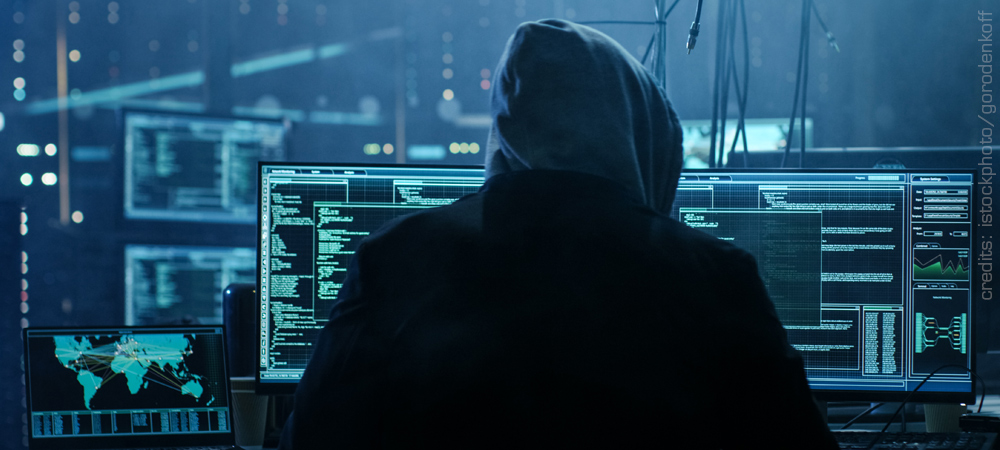

### Task:
#### 1. Scrape the given web-page (see below) with the car model listed for each student. As a result you have to create a DataFrame object with cars ads, with columns:
- car model (модель машины)
- year of production (год производства)
- engine volume (объем двигателя)
- mileage (пробег)
- fuel (вид топлива)
- gearbox mechanism (механизм коробки передач)
- steering wheel location (расположение руля (левый/правый))
- color (цвет)
- body type (тип кузова (седан, универсал и т.д.))
- location (city) (локация авто, город)
- price in USD (цена в долларах США)

url: `https://www.mashina.kg/`

#### 2. Prepare data for modelling.
- change the numeric columns to int or float (if object)
- handling missing values `(Работа с пропущенными значениями, заполнение средним, модой. Либо, например, зависимость пробега от года выпуска)`
- working with categorical data (Ordinal and One-Hot Encodings) `(1 и 0, либо dummies. Например, расположение руля - левый: 0, правый: 1. А когда у нас вариантов больше, то необходимо использовать dummies)`

#### 3. Build a model for car price prediction. Show the score and coefficients. Interpret the coefficients. Answer to the given questions.
`X = all features, excluding the price`

`y = price in USD`

1. How does the year of car manufacture affect the price of the car?
2. How strongly does the mileage of the car affect the car?
3. Does the location of the steering wheel affect the cost?
4. Does the engine volume affect the cost?

## Good Luck!
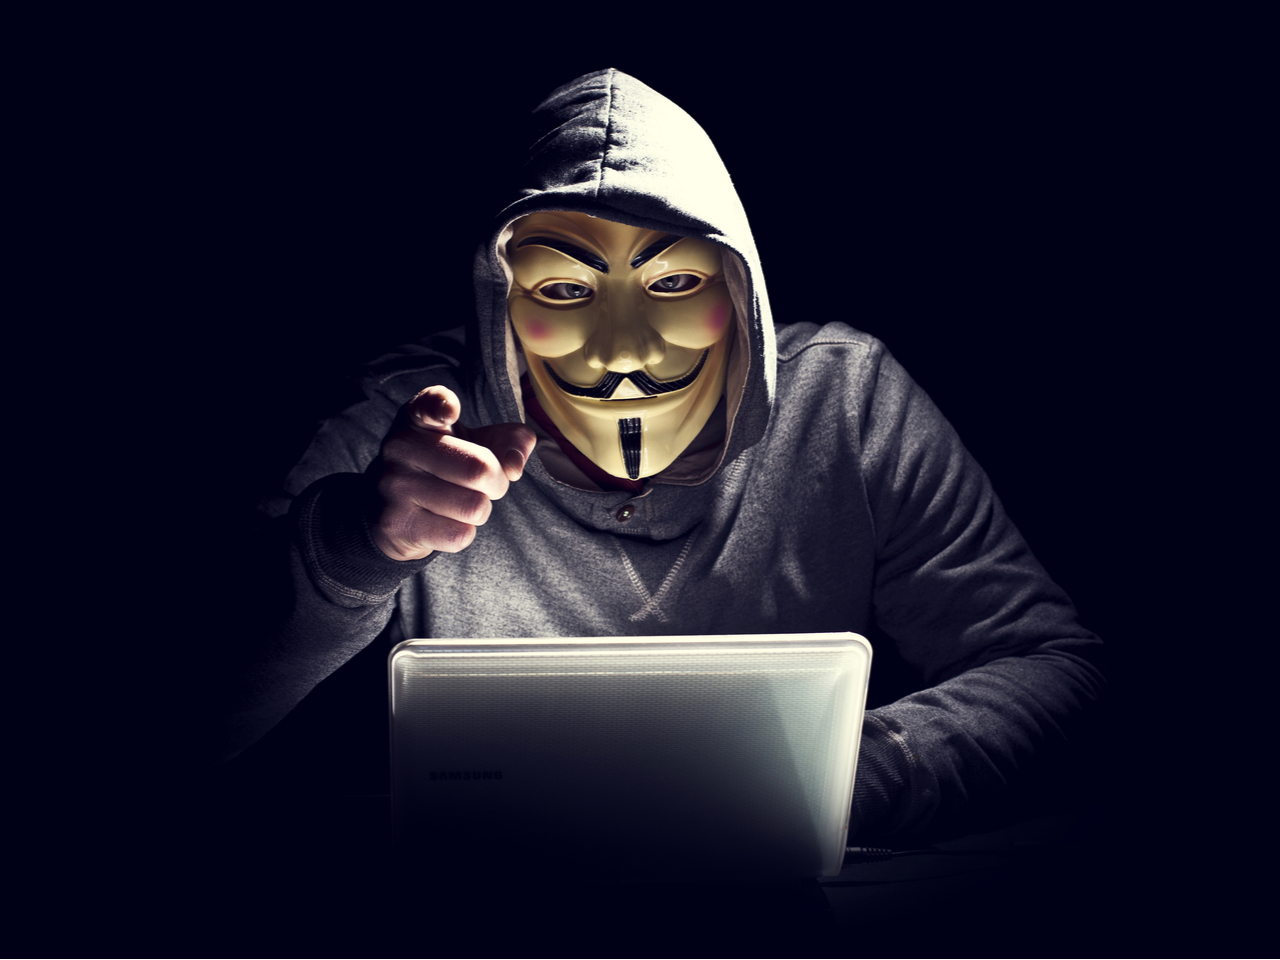

In [6]:


import pandas as pd
from bs4 import BeautifulSoup
import requests

In [7]:
car_model = []
year_of_production = []
engine_volume  = []
mileage  = []
fuel  = []
gearbox_mechanism = [] 
steering_wheel_location = [] 
color  = []
body_type  = []
location  = []
price_USD  = []

In [1]:
for n in range(0, 1):
    html_text = requests.get(f'https://www.mashina.kg/search/honda/?currency=2&price_from=&price_to=&page= {n}').text
    soup = BeautifulSoup(html_text, 'lxml')
    sales= soup.find_all('div', class_ = 'list-item list-label')
    for info in sales: 
        car_model.append(info.find('h2', class_ = 'name').text.replace(' ', '').replace('\n', '').split("'")[0])

NameError: name 'requests' is not defined

In [9]:
car_model

['HondaFit',
 'HondaFit',
 'HondaStepwgn',
 'HondaInsight',
 'HondaAccord',
 'HondaCR-V',
 'HondaInspire',
 'HondaStream',
 'HondaCrosstour',
 'HondaAccord',
 'HondaFit',
 'HondaAccord',
 'HondaAccord',
 'HondaCR-V']

In [4]:
for n in range(0, 31):
    html_text = requests.get(f'https://www.mashina.kg/search/honda/?currency=2&price_from=&price_to=&page= {n}').text
    soup = BeautifulSoup(html_text, 'lxml')
    sales= soup.find_all('div', class_ = 'list-item list-label')
    for info in sales: 
        car_model.append(info.find('h2', class_ = 'name').text.replace(' ', '').replace('\n', '').split("'")[0])
        year_of_production.append(info.find('p', class_ = 'year-miles').text.replace(' ', '').replace('\n', '').split(',')[0][:4])
        
        engine_volume.append(info.find('p', class_ = 'year-miles').text.replace('\n', '').split()[2])
        steering_wheel_location.append(info.find('p', class_ = 'volume').text.replace(' ', '').replace('\n', '').split(',')[0])
        fuel.append(info.find('p', class_ = 'body-type').text.replace(' ', '').replace('\n', '').split(',')[1])

        body_type.append(info.find('p', class_ = 'body-type').text.replace('\n', '').split(',')[0].split()[0])
        location.append(info.find('p', class_ = 'city').text.replace('\n', '').split()[0])
        price_USD.append(info.find('strong').text.replace(' ', '').replace('\n', '').split("$")[1])
#     print(info.find('p', class_ = 'volume').text.replace(' ', '').replace('\n', '').split(','))
        if len(info.find('p', class_ = 'volume').text.replace(' ', '').replace('\n', '').split(',')) == 1:
            mileage.append(None)
        else:
            mileage.append(info.find('p', class_ = 'volume').text.replace(' ', '').replace('\n', '').split(",")[1].split('к')[0])
        if len(info.find('p', class_ = 'year-miles').text.replace(' ', '').replace('\n', '').split(',')) == 2:
            gearbox_mechanism.append(info.find('p', class_ = 'year-miles').text.replace(' ', '').replace('\n', '').split(',')[1])
        else:
            gearbox_mechanism.append(info.find('p', class_ = 'year-miles').text.replace(' ', '').replace('\n', '').split(',')[2])
            
        if len(info.find('p', class_ = 'year-miles').text.replace(' ', '').replace('\n', '').split(',')) == 2:
            engine_volume.append(None)
        else:
            engine_volume.append(info.find('p', class_ = 'year-miles').text.replace('\n', '').split()[2])
    
    


In [5]:
df = pd.DataFrame(list(zip(car_model,year_of_production,engine_volume,steering_wheel_location,fuel,gearbox_mechanism,body_type,location,price_USD,mileage)),
               columns =['Car Model', 'Year','Engine Volume', 'Steering Wheel','Fuel', 'Gearbox Mechanism','Type','Location','Price USD','Mileage'])


In [6]:
df

,Car Model,Year,Engine Volume,Steering Wheel,Fuel,Gearbox Mechanism,Type,Location,Price USD,Mileage
0,HondaOdyssey,1995,2.2,рульсправа,бензин,автомат,минивэн,Бишкек,1651,200000
1,HondaStepwgn,2002,2.2,рульсправа,бензин,автомат,минивэн,Бишкек,7200,311111
2,HondaStepwgn,2001,2,рульслева,бензин,автомат,минивэн,Баткен,5719,146000
3,HondaElysion,2005,2,рульсправа,бензин,автомат,минивэн,Бишкек,11000,90000
4,HondaLegend,2006,2,рульслева,бензин,автомат,седан,Бишкек,8500,215000
...,...,...,...,...,...,...,...,...,...,...
460,HondaFit,2002,3,рульсправа,бензин,вариатор,хэтчбек,Бишкек,5300,None
461,HondaTorneo,2001,3,рульсправа,бензин,автомат,седан,Кадамжай,4245,400000
462,HondaOdyssey,2002,2.4,рульсправа,бензин,автомат,минивэн,Кант,7200,166000
463,HondaCR-V,2015,2.4,рульслева,бензин,вариатор,внедорожник,Бишкек,17500,116000


In [7]:
df['Steering Wheel'] = df['Steering Wheel'].map( { 'рульслева': 0, 'рульсправа': 1} ).astype(int)

In [8]:
print(df.isnull().sum())


Car Model              0
Year                   0
Engine Volume          0
Steering Wheel         0
Fuel                   0
Gearbox Mechanism      0
Type                   0
Location               0
Price USD              0
Mileage              130
dtype: int64


In [9]:
df["Engine Volume"].values

array(['2.2', '2.2', '2', '2', '2', '2', '3', '3', '3.5', '3.5', '2.3',
       '2.3', '2.4', '2.4', '2.5', '2.5', '2', '2', '2.4', '2.4', '2',
       '2', '2.4', '2.4', '2', '2', '2.3', '2.3', '2', '2', '2.2', '2.2',
       '2', '2', '2', '2', '3', '3', '3.5', '3.5', '2.3', '2.3', '2.4',
       '2.4', '2.5', '2.5', '2', '2', '2.4', '2.4', '2', '2', '2.4',
       '2.4', '2', '2', '2.3', '2.3', '2', '2', '1.3', '1.3', '2', '2',
       '1.5', '1.5', '2', '2', '2.2', '2.2', '1.5', '1.5', '2', '2',
       '2.3', '2.3', '2.4', '2.4', '1.5', '1.5', '2', '2', '2', '2', '2',
       '2', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '2', '2', '3', '3',
       '2', '2', '2', '2', '2', '2', '2.2', '2.2', '2', '2', '2', '2',
       '2', '2', '1.3', '1.3', '1.3', '1.3', '2', '2', '2', '2', '1.5',
       '1.5', '3', '3', '1.3', '1.3', '3.2', '3.2', '2', '2', '2', '2',
       '1.3', '1.3', '1.3', '1.3', '1.5', '1.5', '1.5', '1.5', '2', '2',
       '3.5', '3.5', '1.5', '1.5', '1.5', '1.5', '2', '2', '2', '

In [10]:
df["Gearbox Mechanism"].values

array(['автомат', 'автомат', 'автомат', 'автомат', 'автомат', 'механика',
       'автомат', 'автомат', 'автомат', 'автомат', 'автомат', 'автомат',
       'механика', 'автомат', 'автомат', 'автомат', 'автомат', 'автомат',
       'автомат', 'автомат', 'механика', 'автомат', 'автомат', 'автомат',
       'автомат', 'автомат', 'автомат', 'механика', 'автомат', 'автомат',
       'вариатор', 'механика', 'механика', 'автомат', 'автомат',
       'автомат', 'автомат', 'автомат', 'автомат', 'вариатор', 'автомат',
       'автомат', 'вариатор', 'вариатор', 'вариатор', 'вариатор',
       'автомат', 'автомат', 'автомат', 'автомат', 'автомат', 'автомат',
       'автомат', 'автомат', 'автомат', 'вариатор', 'вариатор', 'автомат',
       'автомат', 'вариатор', 'автомат', 'вариатор', 'автомат',
       'механика', 'вариатор', 'вариатор', 'вариатор', 'автомат',
       'вариатор', 'автомат', 'автомат', 'вариатор', 'вариатор',
       'автомат', 'механика', 'автомат', 'автомат', 'автомат', 'механика',
       '

In [11]:
df["Mileage"] = pd.to_numeric(df["Mileage"])
df["Year"] = pd.to_numeric(df["Year"])
df["Engine Volume"] = pd.to_numeric(df["Engine Volume"])
df["Price USD"] = pd.to_numeric(df["Price USD"])

In [12]:

df['Year']= df['Year'].astype(int)
df["Engine Volume"]= df["Engine Volume"].astype(int)
df['Price USD']= df['Price USD'].astype(int)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car Model          465 non-null    object 
 1   Year               465 non-null    int32  
 2   Engine Volume      465 non-null    int32  
 3   Steering Wheel     465 non-null    int32  
 4   Fuel               465 non-null    object 
 5   Gearbox Mechanism  465 non-null    object 
 6   Type               465 non-null    object 
 7   Location           465 non-null    object 
 8   Price USD          465 non-null    int32  
 9   Mileage            335 non-null    float64
dtypes: float64(1), int32(4), object(5)
memory usage: 29.2+ KB


In [14]:
df['Mileage'] = df['Mileage'].fillna(value = df['Mileage'].mean())

In [15]:
df.head()

,Car Model,Year,Engine Volume,Steering Wheel,Fuel,Gearbox Mechanism,Type,Location,Price USD,Mileage
0,HondaOdyssey,1995,2,1,бензин,автомат,минивэн,Бишкек,1651,200000.0
1,HondaStepwgn,2002,2,1,бензин,автомат,минивэн,Бишкек,7200,311111.0
2,HondaStepwgn,2001,2,0,бензин,автомат,минивэн,Баткен,5719,146000.0
3,HondaElysion,2005,2,1,бензин,автомат,минивэн,Бишкек,11000,90000.0
4,HondaLegend,2006,2,0,бензин,автомат,седан,Бишкек,8500,215000.0


In [16]:
df = pd.concat([df, pd.get_dummies(df['Gearbox Mechanism'])],axis=1)
df = pd.concat([df, pd.get_dummies(df['Type'])],axis=1)
df = pd.concat([df, pd.get_dummies(df['Location'])],axis=1)
df = pd.concat([df, pd.get_dummies(df['Fuel'])],axis=1)
df = pd.concat([df, pd.get_dummies(df['Car Model'])],axis=1)

df.head()

,Car Model,Year,Engine Volume,Steering Wheel,Fuel,Gearbox Mechanism,Type,Location,Price USD,Mileage,...,HondaMobilio,HondaOdyssey,HondaOdyssey(NorthAmerica),HondaPilot,HondaRafaga,HondaS-MX,HondaSaber,HondaStepwgn,HondaStream,HondaTorneo
0,HondaOdyssey,1995,2,1,бензин,автомат,минивэн,Бишкек,1651,200000.0,...,0,1,0,0,0,0,0,0,0,0
1,HondaStepwgn,2002,2,1,бензин,автомат,минивэн,Бишкек,7200,311111.0,...,0,0,0,0,0,0,0,1,0,0
2,HondaStepwgn,2001,2,0,бензин,автомат,минивэн,Баткен,5719,146000.0,...,0,0,0,0,0,0,0,1,0,0
3,HondaElysion,2005,2,1,бензин,автомат,минивэн,Бишкек,11000,90000.0,...,0,0,0,0,0,0,0,0,0,0
4,HondaLegend,2006,2,0,бензин,автомат,седан,Бишкек,8500,215000.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Car Model                   465 non-null    object 
 1   Year                        465 non-null    int32  
 2   Engine Volume               465 non-null    int32  
 3   Steering Wheel              465 non-null    int32  
 4   Fuel                        465 non-null    object 
 5   Gearbox Mechanism           465 non-null    object 
 6   Type                        465 non-null    object 
 7   Location                    465 non-null    object 
 8   Price USD                   465 non-null    int32  
 9   Mileage                     465 non-null    float64
 10  автомат                     465 non-null    uint8  
 11  вариатор                    465 non-null    uint8  
 12  механика                    465 non-null    uint8  
 13  робот                       465 non

In [18]:
df.pop('Gearbox Mechanism')
df.pop('Type')
df.pop('Location')
df.pop('Fuel')
df.pop('Car Model')

0      HondaOdyssey
1      HondaStepwgn
2      HondaStepwgn
3      HondaElysion
4       HondaLegend
           ...     
460        HondaFit
461     HondaTorneo
462    HondaOdyssey
463       HondaCR-V
464       HondaCR-V
Name: Car Model, Length: 465, dtype: object

In [19]:
df.head()

,Year,Engine Volume,Steering Wheel,Price USD,Mileage,автомат,вариатор,механика,робот,внедорожник,...,HondaMobilio,HondaOdyssey,HondaOdyssey(NorthAmerica),HondaPilot,HondaRafaga,HondaS-MX,HondaSaber,HondaStepwgn,HondaStream,HondaTorneo
0,1995,2,1,1651,200000.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2002,2,1,7200,311111.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2001,2,0,5719,146000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2005,2,1,11000,90000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,2,0,8500,215000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
y = df['Price USD']

In [22]:
y

0       1651
1       7200
2       5719
3      11000
4       8500
       ...  
460     5300
461     4245
462     7200
463    17500
464     4950
Name: Price USD, Length: 465, dtype: int32

In [23]:
x=df

In [24]:
x.pop('Price USD')

0       1651
1       7200
2       5719
3      11000
4       8500
       ...  
460     5300
461     4245
462     7200
463    17500
464     4950
Name: Price USD, Length: 465, dtype: int32

In [25]:
x

,Year,Engine Volume,Steering Wheel,Mileage,автомат,вариатор,механика,робот,внедорожник,минивэн,...,HondaMobilio,HondaOdyssey,HondaOdyssey(NorthAmerica),HondaPilot,HondaRafaga,HondaS-MX,HondaSaber,HondaStepwgn,HondaStream,HondaTorneo
0,1995,2,1,200000.000000,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,2002,2,1,311111.000000,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2001,2,0,146000.000000,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2005,2,1,90000.000000,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2006,2,0,215000.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,2002,3,1,208605.898507,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
461,2001,3,1,400000.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
462,2002,2,1,166000.000000,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
463,2015,2,0,116000.000000,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [97]:
len(x_train.columns)
len(x_test.columns)

74

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
RandomForest = RandomForestRegressor(n_estimators = 400)


In [100]:
y_train

245    2476
343    5300
7      4300
159    5896
385    2594
       ... 
323    4481
192    5100
117    5200
47     7500
172    4009
Name: Price USD, Length: 348, dtype: int32

In [101]:
RandomForest.fit(x_train, y_train)

RandomForestRegressor(n_estimators=400)

In [102]:
RandomForest.score(x_train, y_train)


0.9737429493463797

In [103]:
RandomForest.score(x_test, y_test)

0.8734149655132484

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
GBC = GradientBoostingClassifier(n_estimators = 230, max_depth = 5)


In [54]:
GBC.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=230)

In [55]:
GBC.score(x_train, y_train)

0.9655172413793104

In [56]:
GBC.score(x_test, y_test)

0.09401709401709402

In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
importances = RandomForest.feature_importances_

In [71]:
indices = np.argsort(importances)[::-1]
names = [x_train.columns.values[i] for i in indices]

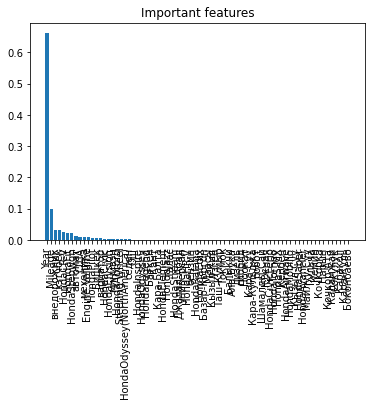

In [73]:
plt.figure()

# Title
plt.title("Important features")

# Bar
plt.bar(range(x_train.shape[1]), importances[indices])

# x Axes names
plt.xticks(range(x_train.shape[1]), names, rotation=90)

# Show
plt.show ()